In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

We will use the Diabetes Dataset to perform Logistic Regression from scratch in python. I already saved a nicely processed file on my Github.

In [24]:
url = "https://github.com/rosenfa/nn/blob/master/pima-indians-diabetes.csv?raw=true"
df_pima=pd.read_csv(url,  header=0)

In [25]:
df_pima
#print(df_pima.Outcome)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Adding a column of 1's to the X matrix for the bias terms and converting the dataframe to a numpy array (more standard).

In [26]:
X = df_pima.iloc[:, :-1].values #everything except the target
y = df_pima.iloc[:, -1].values #the target
# Standardize the predictor variables to have mean 0 and variance 1
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.append(np.ones([len(X),1]),X,1) #For the bias
#X


Next, we define our activation function; the sigmoid function

$h_{\theta}(x) = g(\theta^{T}x)$

$z = \theta^{T}x$

$g(z) = \frac{1}{1+e^{(-z)}}$




X := data set

$\theta$ := vector of weights



h = hypothesis

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [28]:
X.shape

(768, 9)

In [29]:
print(X.shape)
theta = np.zeros(X.shape[1])
theta

(768, 9)


array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

Next we will define our loss (Cost) function:


$J(\theta) = \frac{1}{m} * (-y * log(h) - (1-y)log(1-h)) $

---



Note: when y = 0 the first half of the equation is 0,  
and when y = 1, the second half of the equation is equal to 0.

In [30]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [31]:
 #gradient = np.dot(X.T, (a - y)) / y.shape[0]

We then subtract our values for theta by our chose learning rate * the gradient and loop for gradient descent.

In [32]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))


def predict(X, theta, threshold=0.5):
    if predict_probs(X, theta) >= threshold:
        return 1
    return 0

As we did in the Linear Regression example, we need to split the data
into train / test datasets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [34]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [35]:
print(y_train.shape)

(514,)


In [36]:
X_train.shape

(514, 9)

Now time for gradient descent and updating the values of the weights (theta).  Note that we use the notation m for the number of records,
n for the number of features (which we don't explicitly use in this version) and h as the estimate for the predictions.

In [50]:
#fit the data
cost_array = [] # keeping a list of the cost at each iteration to make sure it is constantly decreasing
iterations = 2000 #like the red arrow in slide 37
lr = 0.01
m, n = X_train.shape
for i in range(iterations):
    Z = np.dot(X_train, theta)
    A = sigmoid(Z) #also called h for 'hypothesis'
    Gradient = np.dot(X_train.T, (A - y_train)) / m
    theta -= lr * Gradient
    cost = loss(A, y_train)
    cost_array.append(cost)

Plotting the reducing in the error per the number of iterations of gradient descent:

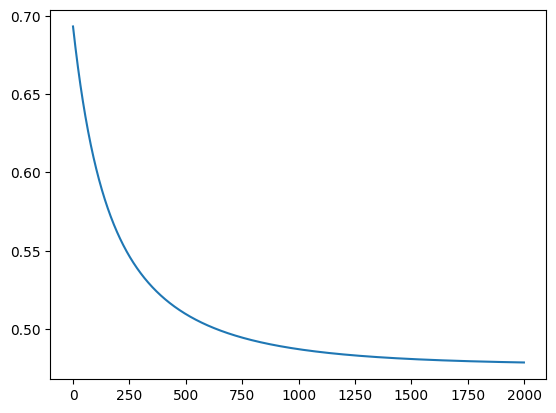

In [38]:
plt.plot(cost_array)
#plotting the cost against the number of iterations to make sure our model is improving the whole time

Printing sample values for records and theta after the learning:

In [39]:
print(theta)
print(y_train[0])
print(X_train[0])

[-0.78296934  0.30489631  0.94013631 -0.14493045  0.04133289 -0.05085305
  0.60542283  0.25583276  0.26702315]
0
[ 1.          0.63994726 -0.49745345  0.56322275  0.4681735  -0.69289057
  0.0644016   1.22654177 -0.61611067]


Now we will test our model on our test data.

In [40]:
correct = 0

for x,y in zip(X_test, y_test):
    p = predict(x, theta)
    if p == y:
        correct += 1

m = len(y_test)
accuracy = (correct)/m*100
print("accuracy: {}".format(accuracy) , "%")


accuracy: 78.34645669291339 %


It looks like our model is performing accurately!

Now we will use the sklearn built in functions to compare our model.

In [41]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()
sk_model.fit( X_train, y_train )

LogisticRegression()

In [42]:
accuracy = sk_model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.34645669291339 %


Note that while the results are the same, the weights weren't!

In [43]:
print('Coefficients: \n', sk_model.coef_)

Coefficients: 
 [[-5.22722662e-06  3.41408152e-01  1.04483107e+00 -1.88267486e-01
   6.01205378e-02 -1.06103513e-01  6.68116721e-01  2.70641943e-01
   2.48208095e-01]]


In [44]:
print(theta)

[-0.78296934  0.30489631  0.94013631 -0.14493045  0.04133289 -0.05085305
  0.60542283  0.25583276  0.26702315]
